# Support Vector Machine (SVM)

SVMs aim to find the optimal hyperplane that separates data points of different classes while maximizing the margin between the classes.

![SVM](./imgs/svm.PNG)

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings("ignore")

With iris dataset.

In [3]:
iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target
print(X.shape)

(150, 4)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
iris_svc = SVC()

iris_svc.fit(X_train, y_train)
y_pred = iris_svc.predict(X_test)

In [6]:
print(iris_svc.score(X_test, y_test))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(cross_val_score(iris_svc, X_train, y_train))

[1.         0.9047619  0.9047619  1.         0.95238095]


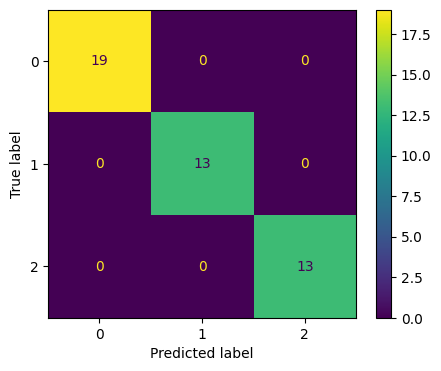

In [8]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
disp.figure_.set_size_inches(w=5, h=4)

With Diagnostic Wisconsin Breast Cancer dataset.

In [3]:
cancer_dataset = load_breast_cancer()

X = cancer_dataset.data
y = cancer_dataset.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
cancer_svc = SVC()

cancer_svc.fit(X_train, y_train)
y_pred = cancer_svc.predict(X_test)

In [6]:
print(cancer_svc.score(X_test, y_test))
print(classification_report(y_test, y_pred))

0.935672514619883
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(cross_val_score(cancer_svc, X_train, y_train))

[0.9        0.9        0.9375     0.86075949 0.87341772]


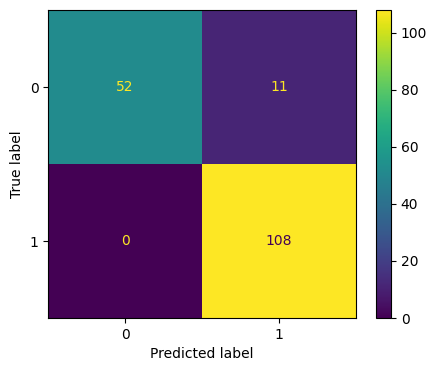

In [8]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
disp.figure_.set_size_inches(w=5, h=4)

Perform hyperparameter tunning.

In [47]:
params = {
    "C": np.arange(0, 6, 1),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}

In [48]:
grid_search = GridSearchCV(SVC(), params, cv=3, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([0, 1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=True)

In [49]:
best_estimator = grid_search.best_estimator_
print(grid_search.best_params_)
print(best_estimator.score(X_test, y_test))

{'C': 5, 'kernel': 'linear'}
0.9590643274853801
